In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import cross_val_score
import sys 
import numpy as np
import matplotlib.pyplot as plts
from sklearn.model_selection import train_test_split
import cv2
import pandas

In [2]:
dataset = pandas.read_csv('../dataset.csv', delimiter=',').sort_values(by='move_type').drop('Unnamed: 103', 1)


In [3]:
dataset.head()

,move_type,descr_number_0_x,descr_number_0_y,descr_number_1_x,descr_number_1_y,descr_number_2_x,descr_number_2_y,descr_number_3_x,descr_number_3_y,descr_number_4_x,...,descr_number_-5_x,descr_number_-5_y,descr_number_-4_x,descr_number_-4_y,descr_number_-3_x,descr_number_-3_y,descr_number_-2_x,descr_number_-2_y,descr_number_-1_x,descr_number_-1_y
150,GO,-9.586957e-17,1.947546e-16,0.329512,0.944152,0.371882,-0.096455,-0.013950,-0.208346,-0.216089,...,0.023832,-0.055872,-0.148591,0.122695,0.027279,-0.013152,0.022872,0.079131,0.022075,-0.063252
206,GO,-6.136932e-17,-1.744506e-16,-0.331556,0.943436,0.220299,0.230476,0.142787,-0.001575,0.065415,...,-0.098383,0.049373,0.135058,0.044619,0.076037,-0.006590,0.076453,-0.030447,-0.039809,-0.113276
205,GO,2.597293e-16,4.742989e-17,-0.582148,0.813083,0.058768,0.245973,0.052853,0.087676,0.027368,...,-0.043858,0.027601,0.083614,-0.049267,0.040450,-0.056175,0.056882,-0.085511,-0.099202,-0.138554
204,GO,1.491136e-16,2.287242e-16,-0.580837,0.814020,0.119369,0.305142,0.065140,0.078804,0.027761,...,0.002701,0.088887,0.054979,-0.033476,0.028367,-0.071916,0.029444,-0.091079,-0.106018,-0.148580
203,GO,3.158017e-16,1.965297e-16,-0.140147,0.990131,0.312879,0.172269,0.125018,-0.071382,0.058858,...,-0.124384,0.068589,0.072961,0.035087,0.091662,0.003118,0.044855,-0.019632,-0.021743,-0.153616


In [4]:
labels = dataset['move_type']

columns = [item for item in list(dataset.columns) if item!='move_type']
features = dataset[columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=42)

# K-Means clustering

In [6]:
n_clusters = 134
score = []
validation = []
for i in range(2,n_clusters):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    score.append(kmeans.score(X_test, y_test))
    validation.append(kmeans.score(X_train, y_train))


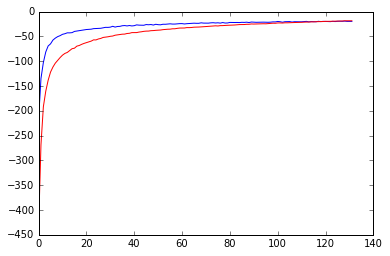

In [7]:
plt.plot(score)
plt.plot(validation, 'r')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=100, random_state=0, max_iter=10000).fit(X_train)

In [9]:
centers = kmeans.cluster_centers_


In [10]:
belong_to = kmeans.predict(features.values)
print(belong_to[:49])
print(belong_to[50:99])
print(belong_to[100:149])
print(belong_to[150:199])

[31 69 49 49 11 72 11 23 81 10 37 37 91 57 57 73 23 23 22 25 25 25 81 27 27
 27 89 27  4 72 19 25 81 25 16 27 81 57 36 87 70 24 24 54 70 69 73 69 11]
[36 10 69 70 24 54 22 22 54 24 57 16 54 36 36 57 57 54 54 24 24 57 91 95 72
 95 83 91 40 48 50 23 50 73 40 72  4 83 10 91 73 72 10 36 70 16 36 57 57]
[70 36 57 16 36 57 36 57 72 25 10 50 89 22 22 87 22 22 22 87 22 27 22 95 27
 95 81 69 49 96 10  4  4 72  4 31 89 25 31 89 25 22 22 22 73 89 27 57 10]
[27 19 19 89 89 89 40 10 77 40 34 77 19 77 34 34 77 34 96 86 23 73 27 89 91
 78 23 49 25 73 10 73 23 23 23 73 69 73 69 22 20 23 69 73 72 78 72 40 69]


In [11]:
def reconstruct(descriptors):
    """ reconstruct the image using the normalized descriptors and plot it
        Keyword arguments: 
         - descriptors : the normalized fourier descriptors
    """
    contour_reconstruct = np.fft.ifft(descriptors)
    contour_reconstruct = np.array(
        [contour_reconstruct.real, contour_reconstruct.imag])
    contour_reconstruct = np.transpose(contour_reconstruct)
    contour_reconstruct = np.expand_dims(contour_reconstruct, axis=1)
    # make positive
    if contour_reconstruct.min() < 0:
        contour_reconstruct -= contour_reconstruct.min()
    # normalization
    contour_reconstruct *= 800 / contour_reconstruct.max()
    # type cast to int32
    contour_reconstruct = contour_reconstruct.astype(np.int32, copy=False)
    black = np.zeros((800, 800), np.uint8)
    # draw and visualize
    cv2.drawContours(black, contour_reconstruct, -1, 255, thickness=-1)
    cv2.imshow("black", black)
    cv2.waitKey(10000)
    cv2.imwrite("reconstruct_result.jpg", black)
    cv2.destroyAllWindows()

### To run if dataset and not dataset norm 

In [34]:
img_nb = 793
complex_descriptors = []
for i in range(int(len(features.values[img_nb])/2)):
    complex_descriptors.append(complex(features.values[img_nb][2*i], features.values[img_nb][2*i+1]))
complex_descriptors
reconstruct(complex_descriptors)
labels[3]

'GO'

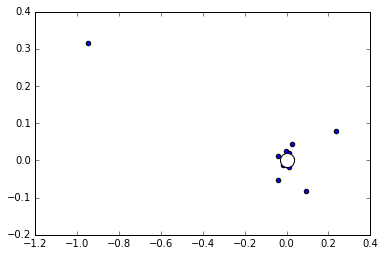

In [35]:
plt.scatter(X_test[7][3::2],X_test[7][2::2] )
plt.scatter(centers[1, 0], centers[1, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
plt.show()

# KNN clustering

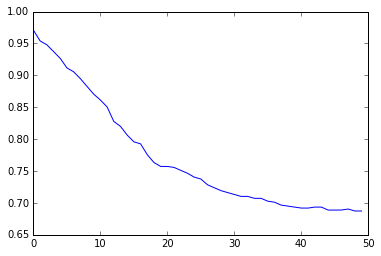

In [14]:
# creating odd list of K for KNN
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(cv_scores)
plt.show()

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, weights='distance').fit(X_train,y_train ) 

In [16]:
knn_belong_to = knn_classifier.predict(features.values)

In [17]:
test_prediction = knn_classifier.predict(X_test)

In [18]:
missclassified = 0
for i in range(len(y_test)):
    if y_test[i] != test_prediction[i]: 
        missclassified = missclassified +1
print(missclassified)

8


## Feedforward Neural Network 

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',
                     hidden_layer_sizes=(41), random_state=1, 
                     max_iter = 10000, early_stopping=True)

clf.fit(X_train,y_train)                         
test_fnn_prediction = clf.predict(X_test)
test_fnn_overfit = clf.predict(X_train)

In [24]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != test_fnn_prediction[i]: 
        print("{} missclassified as {} number {}".format(y_test[i], test_fnn_prediction[i], i))
        count +=1
        
print(count/len(y_test)*100)


GO missclassified as LEFT number 31
RIGHT missclassified as STOP number 32
RIGHT missclassified as STOP number 38
RIGHT missclassified as STOP number 40
STOP missclassified as RIGHT number 80
STOP missclassified as GO number 83
STOP missclassified as GO number 85
LEFT missclassified as RIGHT number 125
LEFT missclassified as RIGHT number 138
RIGHT missclassified as LEFT number 160
LEFT missclassified as RIGHT number 165
STOP missclassified as RIGHT number 173
GO missclassified as STOP number 212
STOP missclassified as RIGHT number 228
RIGHT missclassified as GO number 253
STOP missclassified as RIGHT number 285
STOP missclassified as RIGHT number 287
RIGHT missclassified as LEFT number 309
STOP missclassified as GO number 312
5.864197530864197


In [21]:
for i in range(len(y_train)):
    if y_train[i] != test_fnn_overfit[i]: 
        print("{} missclassified as {}".format(y_train[i], test_fnn_overfit[i]))
        count +=1
        
print(count/len(y_train)*100)

2.8963414634146343


In [33]:
# check the incorrect data 
dataset_prediction = clf.predict(features.values)
for i in range(len(labels.values)):
    if labels.values[i] != dataset_prediction[i]: 
        print("{} missclassified as {} number {}".format(labels.values[i], dataset_prediction[i], i))
        count +=1
        
print(count/len(labels.values)*100)

GO missclassified as LEFT number 30
GO missclassified as STOP number 77
LEFT missclassified as RIGHT number 323
LEFT missclassified as RIGHT number 334
LEFT missclassified as RIGHT number 350
RIGHT missclassified as LEFT number 462
RIGHT missclassified as GO number 485
RIGHT missclassified as STOP number 538
RIGHT missclassified as STOP number 539
RIGHT missclassified as LEFT number 568
RIGHT missclassified as STOP number 588
STOP missclassified as GO number 793
STOP missclassified as GO number 803
STOP missclassified as RIGHT number 810
STOP missclassified as RIGHT number 820
STOP missclassified as RIGHT number 844
STOP missclassified as GO number 848
STOP missclassified as RIGHT number 924
STOP missclassified as RIGHT number 969
7.755102040816326


In [37]:
img_nb = 538
complex_descriptors = []
for i in range(int(len(features.values[img_nb])/2)):
    complex_descriptors.append(complex(features.values[img_nb][2*i], features.values[img_nb][2*i+1]))
complex_descriptors
reconstruct(complex_descriptors)
labels[3]

'GO'